# Plot transmon-transmon CR effect

In [4]:
import numpy as np
import time
import scipy.interpolate
import matplotlib.pyplot as plt
from typing import List, Dict, Callable
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [5]:
with open("data_cr_transmon_transmon/data_cr_transmon_transmon_strong_drive.txt") as file_data:
    result_tt = json.load(file_data)
with open("data_cr_transmon_fluxonium/data_cr_transmon_fluxonium_strong_drive.txt") as file_data:
    result_tf = json.load(file_data)

In [3]:
n_points = len(result_tt)
xt = np.zeros(n_points)
yt = np.zeros(n_points)
zt = np.zeros(n_points)
for k in range(0, n_points):
    xt[k] = result_tt[k]["freq"]
    yt[k] = result_tt[k]["eps_ratio"]
    zt[k] = np.abs(result_tt[k]["cr"])
xt_vec, yt_vec = np.linspace(xt.min(), \
    xt.max(), n_points), np.linspace(yt.min(), yt.max(), n_points)
xt_vec, yt_vec = np.meshgrid(xt_vec, yt_vec)
# Interpolate
rbf_func = scipy.interpolate.Rbf(xt, yt, zt, function='linear')
cr_rbf_t = rbf_func(xt_vec, yt_vec)

In [4]:
n_points = len(result_tf)
xf = np.zeros(n_points)
yf = np.zeros(n_points)
zf = np.zeros(n_points)
for k in range(0, n_points):
    xf[k] = result_tf[k]["freq"]
    yf[k] = result_tf[k]["eps_ratio"]
    zf[k] = np.abs(result_tf[k]["cr"])
xf_vec, yf_vec = np.linspace(xf.min(), \
    xf.max(), n_points), np.linspace(yf.min(), yf.max(), n_points)
xf_vec, yf_vec = np.meshgrid(xf_vec, yf_vec)
# Interpolate
rbf_func = scipy.interpolate.Rbf(xf, yf, zf, function='linear')
cr_rbf_f = rbf_func(xf_vec, yf_vec)

In [5]:
def plot_cr_effect_single(
    x_vec,
    y_vec,
    cr_rbf,
    label: str,
    plot_setup={'fs': 22, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':16},
    save=False
):
    color_map = 'seismic'
    
    aspect = (np.max(x_vec) - np.min(x_vec))/(np.max(y_vec) - np.min(y_vec))
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cr_rbf, vmin=np.min(cr_rbf), vmax=np.max(cr_rbf), 
                   origin='lower', extent=[np.min(x_vec), np.max(x_vec), 
                   np.min(y_vec), np.max(y_vec)], 
                   cmap=color_map, aspect=aspect)
    ax.set_xlabel("$\omega_t/2 \pi \, (\mathrm{GHz})$", fontsize=plot_setup["fs"])
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    ax.set_xticks(x_ticks)
    x_ticks_latex = ['$' + str(x)[:3] + '$' for x in x_ticks]
    ax.set_xticklabels(x_ticks_latex)
    y_ticks = [0.00 + 0.05*y for y in range(7)]
    ax.set_yticks(y_ticks)
    y_ticks_latex = ['$0.00$', '$0.05$', '$0.10$', '$0.15$', '$0.20$', '$0.25$', '$0.30$']
    ax.set_yticklabels(y_ticks_latex)
    ax.tick_params(axis='both', labelsize=plot_setup["ls"])
    ax.set_ylabel("$\\varepsilon_d^{*}$", fontsize=plot_setup["fs"])
    cax = fig.add_axes([ax.get_position().x1 + \
        0.05, ax.get_position().y0 , 0.05, ax.get_position().height])
    cbar = fig.colorbar(im, cax=cax)
    cbar_ticks = [2*y for y in range(5)]
    cbar.set_ticks(cbar_ticks)
    cbar_ticks_latex = ['$' + str(y) + '$' for y in cbar_ticks]
    cbar.set_ticklabels(cbar_ticks_latex)
    cbar.ax.tick_params(labelsize=plot_setup["ls"])
    cbar.set_label("$\mu_{\mathrm{CR}}/h \, (\mathrm{MHz})$", fontsize=plot_setup["fs"], 
                   rotation=270, labelpad=30)
    if save:
        plt.savefig("transmon_" + label + "_cr_effect.svg")
    plt.show()

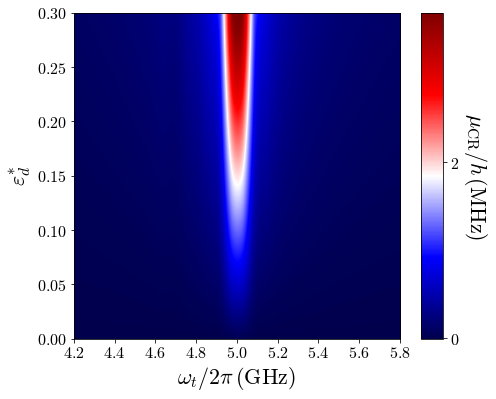

In [6]:
plot_cr_effect_single(xt_vec, yt_vec, cr_rbf_t, label="transmon", save=False)

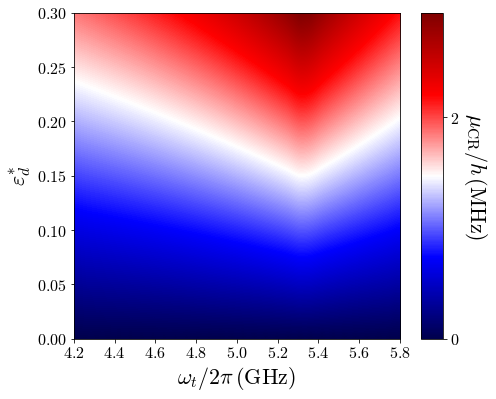

In [7]:
plot_cr_effect_single(xf_vec, yf_vec, cr_rbf_f, label="fluxonium", save=False)

In [58]:
def plot_cr_effect(
    xt_vec,
    yt_vec,
    cr_rbf_t,
    xf_vec,
    yf_vec,
    cr_rbf_f,
    plot_setup={'fs': 22, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':16},
    save=False
):
    color_map = 'seismic'
    
    
    fig, ax = plt.subplots(2, figsize=(8, 10))
    aspect = (np.max(xt_vec) - np.min(xt_vec))/(np.max(yt_vec) - np.min(yt_vec))
    im = ax[0].imshow(cr_rbf_t, vmin=np.min(cr_rbf_t), vmax=np.max(cr_rbf_t), 
                   origin='lower', extent=[np.min(xt_vec), np.max(xt_vec), 
                   np.min(yt_vec), np.max(yt_vec)], 
                   cmap=color_map, aspect=aspect)
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    ax[0].set_xticks(x_ticks)
    x_ticks_latex = ['$' + str(x)[:3] + '$' for x in x_ticks]
    ax[0].set_xticklabels(x_ticks_latex)
    y_ticks = [0.00 + 0.05*y for y in range(7)]
    ax[0].set_yticks(y_ticks)
    y_ticks_latex = ['$0.00$', '$0.05$', '$0.10$', '$0.15$', '$0.20$', '$0.25$', '$0.30$']
    ax[0].set_yticklabels(y_ticks_latex)
    ax[0].tick_params(axis='both', labelsize=plot_setup["ls"])
    ax[0].set_ylabel("$\\varepsilon_{d, t}^{*}$", fontsize=plot_setup["fs"])
    
    aspect = (np.max(xf_vec) - np.min(xf_vec))/(np.max(yf_vec) - np.min(yf_vec))
    im = ax[1].imshow(cr_rbf_f, vmin=np.min(cr_rbf_t), vmax=np.max(cr_rbf_t), 
                   origin='lower', extent=[np.min(xf_vec), np.max(xf_vec), 
                   np.min(yf_vec), np.max(yf_vec)], 
                   cmap=color_map, aspect=aspect)
    ax[1].set_xlabel("$\omega_t/2 \pi \, (\mathrm{GHz})$", fontsize=plot_setup["fs"])
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    ax[1].set_xticks(x_ticks)
    x_ticks_latex = ['$' + str(x)[:3] + '$' for x in x_ticks]
    ax[1].set_xticklabels(x_ticks_latex)
    y_ticks = [0.00 + 0.05*y for y in range(7)]
    ax[1].set_yticks(y_ticks)
    y_ticks_latex = ['$0.00$', '$0.05$', '$0.10$', '$0.15$', '$0.20$', '$0.25$', '$0.30$']
    ax[1].set_yticklabels(y_ticks_latex)
    ax[1].tick_params(axis='both', labelsize=plot_setup["ls"])
    ax[1].set_ylabel("$\\varepsilon_{d, f}^{*}$", fontsize=plot_setup["fs"])
    y_cbar_in = ax[1].get_position().y0
    y_cbar_fin = ax[0].get_position().height + ax[1].get_position().height*1.2
    cax = fig.add_axes([ax[1].get_position().x1 + \
        0.05, y_cbar_in , 0.05, y_cbar_fin])
    cbar = fig.colorbar(im, cax=cax)
    cbar_ticks = [0.5*y for y in range(8)]
    cbar.set_ticks(cbar_ticks)
    cbar_ticks_latex = ['$' + str(y) + '$' for y in cbar_ticks]
    cbar.set_ticklabels(cbar_ticks_latex)
    cbar.ax.tick_params(labelsize=plot_setup["ls"])
    cbar.set_label("$\mu_{\mathrm{CR}}/h \, (\mathrm{MHz})$", fontsize=plot_setup["fs"], 
                   rotation=270, labelpad=35)
    if save:
        plt.savefig("cr_effect_comparison.svg")
    plt.show()

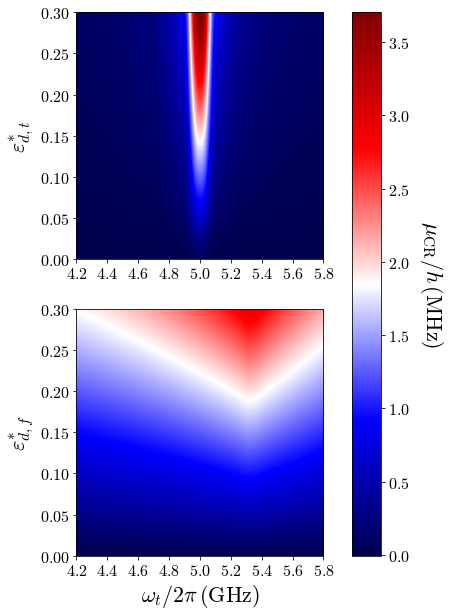

In [59]:
plot_cr_effect(xt_vec, yt_vec, cr_rbf_t, xf_vec, yf_vec, cr_rbf_f, save=True)